## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2. Load the data set**


In [3]:
df = pd.read_csv('FT_dg_3615.csv')

In [14]:
X = df[['DISTANCE', 'Heading','Elevation', 'AppliedRat']]
Y = df['Mic']

## **3. Data pre-processing**

In [15]:
# Examine X dimension
X.shape

(2230, 4)

In [16]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(2230, 4)

In [17]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## **4. Compare ML algorithms**

In [ ]:
# align numpy and pandas versions to fix ImportError: cannot import name 'values_from_object' from 'pandas._libs.lib' #337
!pip uninstall numpy -y
!pip install numpy==1.20.1

!pip uninstall pandas -y
!pip install pandas==1.2.2

In [18]:
import pandas as pd
# Defines and builds the lazyclassifier
# 42 algorithms 
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)

train,test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:06<00:00,  6.64it/s]


In [19]:
# Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.47,0.48,0.05,0.42
XGBRegressor,0.45,0.46,0.06,0.14
LGBMRegressor,0.45,0.46,0.06,0.13
RandomForestRegressor,0.40,0.41,0.06,0.63
ExtraTreesRegressor,0.40,0.41,0.06,0.34
BaggingRegressor,0.36,0.36,0.06,0.07
GradientBoostingRegressor,0.31,0.32,0.06,0.37
NuSVR,0.21,0.22,0.07,0.59
KNeighborsRegressor,0.20,0.21,0.07,0.02


In [20]:
# Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.47,0.48,0.05,0.42
XGBRegressor,0.45,0.46,0.06,0.14
LGBMRegressor,0.45,0.46,0.06,0.13
RandomForestRegressor,0.40,0.41,0.06,0.63
ExtraTreesRegressor,0.40,0.41,0.06,0.34
BaggingRegressor,0.36,0.36,0.06,0.07
GradientBoostingRegressor,0.31,0.32,0.06,0.37
NuSVR,0.21,0.22,0.07,0.59
KNeighborsRegressor,0.20,0.21,0.07,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

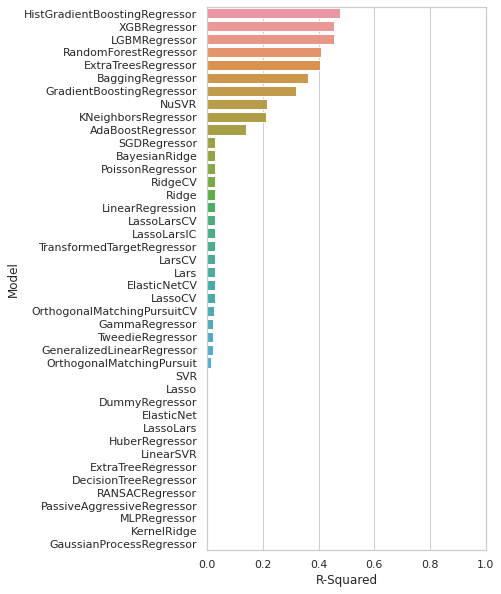

In [21]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

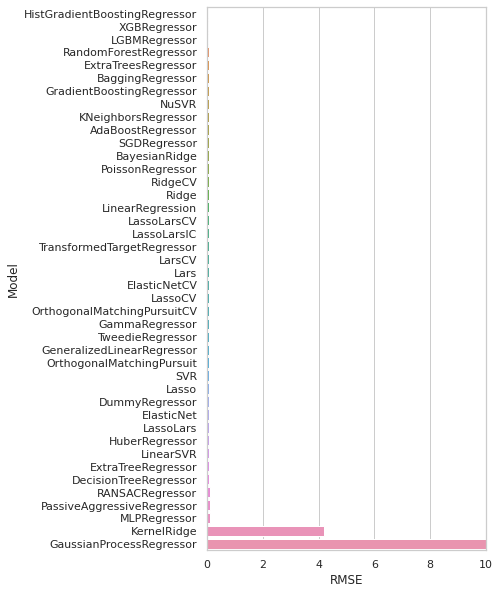

In [22]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

[(0.0, 4.0)]

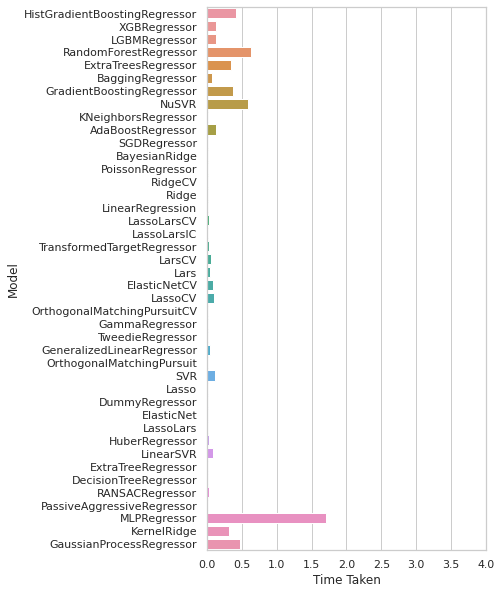

In [23]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 4))